In [3]:
!pip install deslib
!pip install umap-learn

     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 1.2MB 5.7MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=c389cc7c8ab8d7b1124853d69587aab71426bebf03684df36f4d880182ebf14b
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=2c9f02a459d81dda8a79edb3905ae80b79ac895533f001ab71ba92776fdba013
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [4]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from deslib.util.diversity import double_fault, Q_statistic, negative_double_fault
import umap
import matplotlib.lines as mlines
from deslib.util.aggregation import *

In [5]:
rd = np.random.RandomState(42)

In [6]:
def calc_delta(labels = {}, pred = {}, clfs=[], function='k', negative=False, inverso=False):
    size = len(clfs)
    delta = np.zeros(shape=(size, size))
    for i, clf1 in enumerate(clfs):
        for k, clf2 in enumerate(clfs):
            if function == 'k':
              delta[i][k] = cohen_kappa_score(labels, pred[clf1], pred[clf2])
            elif function == 'q':
              delta[i][k] = Q_statistic(labels, pred[clf1], pred[clf2])
            else:
              if negative==False:
                if inverso==False:
                  delta[i][k] = double_fault(labels, pred[clf1], pred[clf2])
                else:
                  delta[i][k] = 1/double_fault(labels, pred[clf1], pred[clf2])
              if negative==True:
                delta[i][k] = negative_double_fault(labels, pred[clf1], pred[clf2])
    return delta, clfs


def tsne_full(labels,  delta , title='' , escala=0, size=5, x_ini=0, x_fim=0, y_ini=0, y_fim=0, espacamento=50, per=100 , lern=200.0, iterations=2500, ang=0.5, size_dot=10, cores={}, simbolos={}, tsne=True, neighbors=2):
    if tsne:
      model = TSNE(init='pca', early_exaggeration=espacamento, perplexity=per, learning_rate=lern, random_state=42, n_iter=iterations, angle=ang)
      # new_values = tsne_model.fit_transform(delta)
    else:
      model = umap.UMAP(
          n_neighbors=neighbors,
          min_dist=1,
          n_components=2,
          metric='euclidean',          
          random_state=np.random.RandomState(42)
      )
    new_values = model.fit_transform(delta)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(size, size))
    plt.title(title)

    if escala > 0:
        plt.ylim(escala * -1, escala)
        plt.xlim(escala * -1, escala)
    else:
        plt.ylim(y_ini, y_fim)
        plt.xlim(x_ini, x_fim)
    
    dot = 0
    for i in range(len(x)):
        plt.scatter(x[i], y[i], s=size_dot,  marker=simbolos[dot], c=cores[dot])        
        
        # if labels[i] == 'SVM-CV' and i==40:
        #     posicao=(5, -20)
        # elif labels[i] == 'MNB-GL':
        #     posicao=(5, 25)
        # elif i == 56:
        #     posicao=(5, 25)
        # else:  
        posicao=(5, 8)

        clf_label, sufix_label = labels[i].split("-")[0], labels[i].split("-")[1]
        
        if sufix_label == "CV":
            label_atual = "{}-TF".format(clf_label)
        else:
          label_atual = labels[i]
        # print(labels[i])
        plt.annotate(label_atual, xy=(x[i], y[i]), xytext=posicao, textcoords='offset points', ha='center', va='bottom')  
        dot = dot+1
        if dot == 5:
            dot = 0

    m1 = mlines.Line2D([], [], color=cores[0], marker=simbolos[0], linestyle='None', markersize=10, label='TF')
    m2 = mlines.Line2D([], [], color=cores[1], marker=simbolos[1], linestyle='None', markersize=10, label='TFIDF')
    m3 = mlines.Line2D([], [], color=cores[2], marker=simbolos[2], linestyle='None', markersize=10, label='Word2Vec')
    m4 = mlines.Line2D([], [], color=cores[3], marker=simbolos[3], linestyle='None', markersize=10, label='Glove')
    m5 = mlines.Line2D([], [], color=cores[4], marker=simbolos[4], linestyle='None', markersize=10, label='FastText')
    

    plt.legend(handles=[m1, m2, m3, m4, m5])
    plt.show()

# Data

In [7]:
# ZW
test_zw = pd.read_csv("pred_test_zw.csv")
val_zw = pd.read_csv("pred_val_zw.csv")

val_zw, class_val_zw = val_zw.drop(columns=['Unnamed: 0', 'norm']), val_zw['norm']
test_zw, class_test_zw = test_zw.drop(columns=['Unnamed: 0', 'norm']), test_zw['norm']

# # TD
# test_td = pd.read_csv("pred_test_td.csv")
# val_td = pd.read_csv("pred_val_td.csv")

# val_td, class_val_td = val_td.drop(columns=['Unnamed: 0', 'class']), val_td['class']
# test_td, class_test_td = test_td.drop(columns=['Unnamed: 0', 'class']), test_td['class']

# # TD+ZW
# test_td_zw = pd.read_csv("pred_test_td_zw.csv")
# val_td_zw = pd.read_csv("pred_val_td_zw.csv")

# val_td_zw, class_val_td_zw = val_td_zw.drop(columns=['Unnamed: 0', 'class']), val_td_zw['class']
# test_td_zw, class_test_td_zw = test_td_zw.drop(columns=['Unnamed: 0', 'class']), test_td_zw['class']

In [9]:
# print(val_td)

In [10]:
%%time
delta_double_zw, labels_zw = calc_delta(class_val_zw, val_zw, val_zw.columns, function="d")
# delta_double_td, labels_td = calc_delta(class_val_td, val_td, val_td.columns, function="d")
# delta_double_td_zw, labels_td_zw = calc_delta(class_val_td_zw, val_td_zw, val_td_zw.columns, function="d")

CPU times: user 6min 25s, sys: 742 ms, total: 6min 25s
Wall time: 6min 26s


In [11]:
print(delta_double_zw)

[[0.09197782 0.07312384 0.05974122 ... 0.01345656 0.0754159  0.02365989]
 [0.07312384 0.09737523 0.06484288 ... 0.01212569 0.07637708 0.02432532]
 [0.05974122 0.06484288 0.13530499 ... 0.01227357 0.10033272 0.02536044]
 ...
 [0.01345656 0.01212569 0.01227357 ... 0.01974122 0.01456562 0.0135305 ]
 [0.0754159  0.07637708 0.10033272 ... 0.01456562 0.16820702 0.03393715]
 [0.02365989 0.02432532 0.02536044 ... 0.0135305  0.03393715 0.05426987]]


In [12]:
delta_double_zw_n, labels_zw = calc_delta(class_val_zw, val_zw, val_zw.columns, function="d", negative=True)
# delta_double_td_n, labels_td = calc_delta(class_val_td, val_td, val_td.columns, function="d", negative=True)
# delta_double_td_zw_n, labels_td_zw = calc_delta(class_val_td_zw, val_td_zw, val_td_zw.columns, function="d", negative=True)

In [13]:
delta_double_zw_i, labels_zw = calc_delta(class_val_zw, val_zw, val_zw.columns, function="d", negative=True, inverso=True)
# delta_double_td_i, labels_td = calc_delta(class_val_td, val_td, val_td.columns, function="d", negative=True, inverso=True)
# delta_double_td_zw_i, labels_td_zw = calc_delta(class_val_td_zw, val_td_zw, val_td_zw.columns, function="d", negative=True, inverso=True)

In [14]:
cores = {}
cores[0] = '#DAA520'
cores[1] = '#FF0000'
cores[2] = '#0000FF'
cores[3] = '#228B22'
cores[4] = '#000000'

simbolos = {}
simbolos[0] = 'X'
simbolos[1] = 'd'
simbolos[2] = '*'
simbolos[3] = "^"
simbolos[4] = 'o'

# DOUBLE FAULT


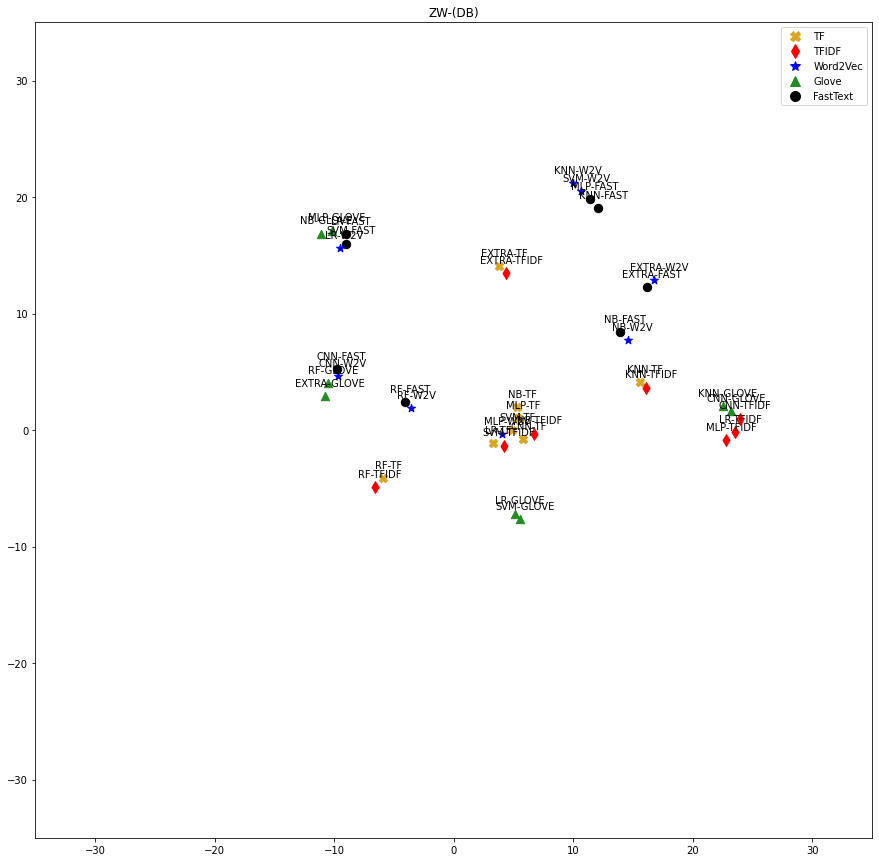

CPU times: user 1.87 s, sys: 19 ms, total: 1.89 s
Wall time: 1.9 s


In [27]:
%%time
tsne_full(labels_zw, delta_double_zw, 'ZW-(DB)', cores=cores, simbolos=simbolos, escala=35, per=30, size=15 , size_dot=70, tsne=False, neighbors=2)

In [16]:
# tsne_full(labels_td, delta_double_td, 'TD-(DB)', cores=cores, simbolos=simbolos, escala=35, per=25, size=15, size_dot=70, tsne=False)

In [17]:
# tsne_full(labels_td_zw, delta_double_td_zw, 'TD+ZW-(DB)', cores=cores, simbolos=simbolos, escala=45, per=25, size=15, size_dot=70, tsne=False)

# NEGATIVE DOUBLE FAULT

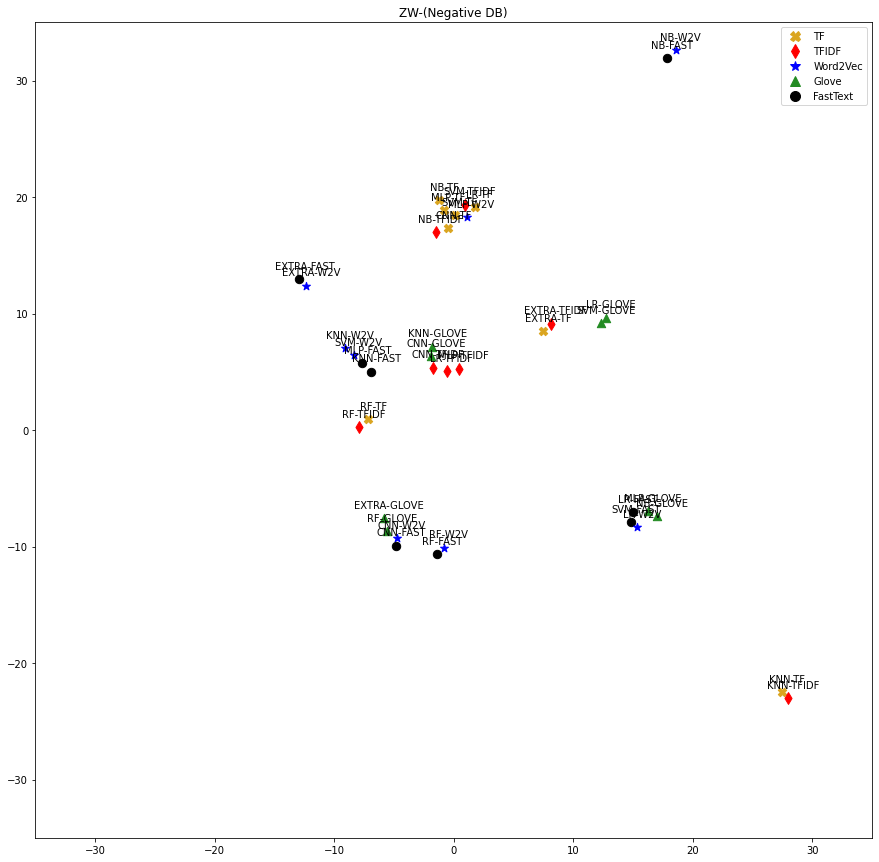

In [18]:
tsne_full(labels_zw, delta_double_zw_n, 'ZW-(Negative DB)', cores=cores, simbolos=simbolos, escala=35, per=30, size=15 , size_dot=70, tsne=False, neighbors=2)

In [19]:
# tsne_full(labels_td, delta_double_td_n, 'TD-(Negative DB)', cores=cores, simbolos=simbolos, escala=35, per=25, size=15, size_dot=70, tsne=False)

In [20]:
# tsne_full(labels_td_zw, delta_double_td_zw_n, 'TD+ZW-(Negative DB)', cores=cores, simbolos=simbolos, escala=45, per=25, size=15, size_dot=70, tsne=False)

# INVERSO

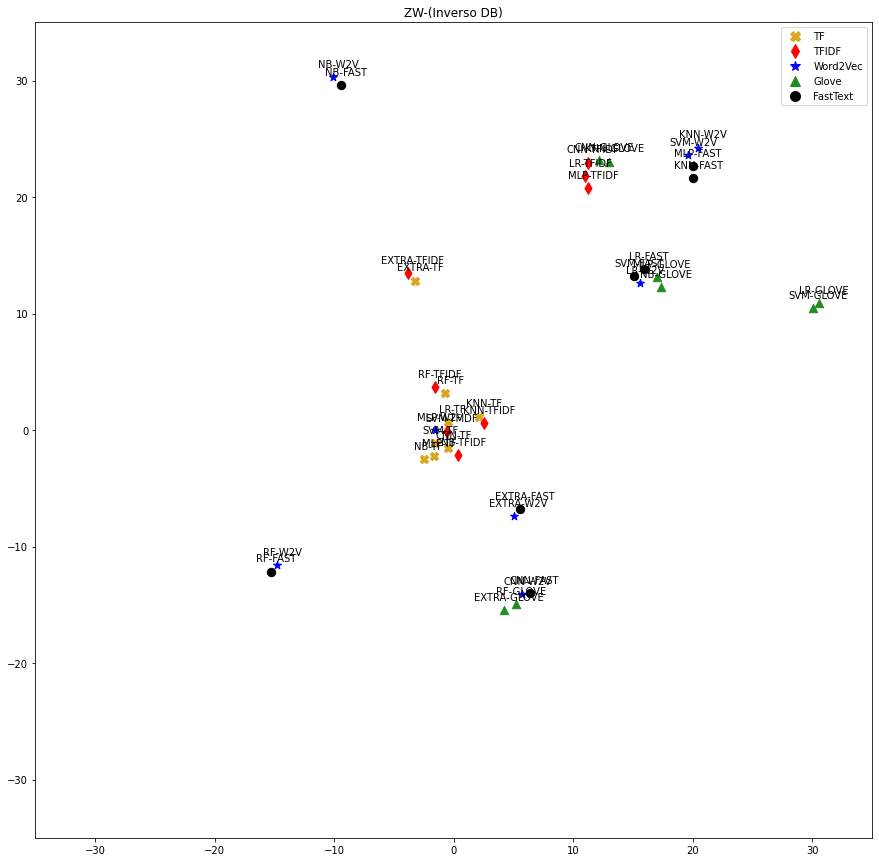

In [21]:
tsne_full(labels_zw, delta_double_zw_i, 'ZW-(Inverso DB)', cores=cores, simbolos=simbolos, escala=35, per=30, size=15 , size_dot=70, tsne=False, neighbors=2)

In [22]:
# tsne_full(labels_td, delta_double_td_i, 'TD-(Inverso DB)', cores=cores, simbolos=simbolos, escala=35, per=25, size=15, size_dot=70, tsne=False)

In [23]:
# tsne_full(labels_td_zw, delta_double_td_zw_i, 'TD+ZW-(Inverso DB)', cores=cores, simbolos=simbolos, escala=45, per=25, size=15, size_dot=70, tsne=False)